In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


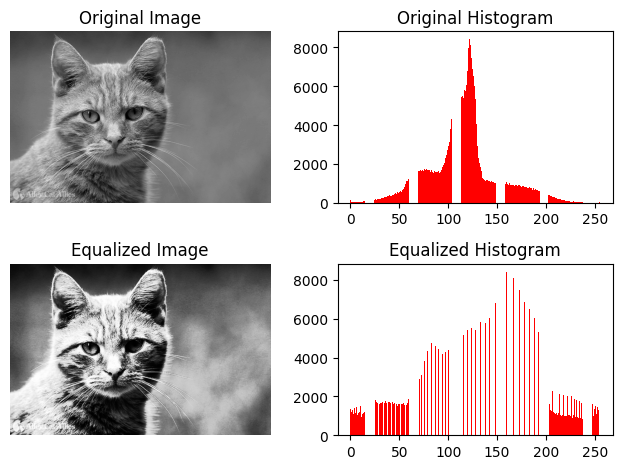

In [3]:
def histogram_equalization(image):
    def calculate_histogram(img):
        hist = np.zeros(256, dtype=np.float32)
        for pixel in img.ravel():
            hist[pixel] += 1
        return hist

    def calculate_cdf(hist):
        cdf = np.zeros_like(hist, dtype=np.float64)
        cdf[0] = hist[0]
        for i in range(1, len(hist)):
            cdf[i] = cdf[i - 1] + hist[i]
        
        cdf_min = np.min(cdf)
        cdf_max = np.max(cdf)
        cdf = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
        return cdf.astype(np.uint8)

    hist = calculate_histogram(image)
    
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.bar(range(256), hist, color='red')
    plt.title('Original Histogram')

    cdf = calculate_cdf(hist)

    equalizedImage = cdf[image]

    plt.subplot(2, 2, 3)
    plt.imshow(equalizedImage, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    histEqualized = calculate_histogram(equalizedImage)
    plt.subplot(2, 2, 4)
    plt.bar(range(256), histEqualized, color='red')
    plt.title('Equalized Histogram')

    plt.tight_layout()
    plt.show()

img = cv.imread("img.jpg", cv.IMREAD_GRAYSCALE)
histogram_equalization(img)